<a href="https://colab.research.google.com/github/Rochakr4/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
#importing essential datasets
import numpy as np#For array operations
import pandas as pd#For dataframe operation
import datetime as dt#For datetime
import matplotlib.pyplot as plt#For visualisation
import seaborn as sns#For visualisation
import plotly.express as px#For visualisation
from pylab import rcParams#For visualisation
import matplotlib.cm as cm#For visualisation

from sklearn.cluster import KMeans#For Kmeans clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering#For Hierarchical clustering
from sklearn.cluster import DBSCAN#Importing DBSCAN

from sklearn.preprocessing import StandardScaler#For scalling operation
from sklearn.datasets import make_blobs
from sklearn import metrics#For Scoring operations
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading file
df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT 4-Online Retail Customer Segmentation /Online Retail.csv')

In [4]:
df.head()#How does the dataset look like...?

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom

In [5]:
df.info()#Checking Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()#Checking describe

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

The dataset contains two numerical features and six categorical features.

# Data Prepping

## Feature alteration or feature addition

For further better analysis iam creating date-related features such as ‘month’, ‘day’, ‘year’ etc.

In [7]:
#Removing the time from invoice date, since it's not in proper format. This will enable us to convert string type to datetime object
df['InvoiceDate']=df['InvoiceDate'].apply(lambda x: x[:][:-5])
#convering to datetime object
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
#creating month year and day features
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Day_Name']=df['InvoiceDate'].dt.day_name()
df['Year']=df['InvoiceDate'].dt.year

After necessary feature alteration let's check how the dataset looklike

In [8]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  Month  Day Day_Name  \
0  2010-01-12       2.55     17850.0  United Kingdom      1   12  Tuesday   
1  2010-01-12       3.39     17850.0  United Kingdom      1   12  Tuesday   
2  2010-01-12       2.75     17850.0  United Kingdom      1   12  Tuesday   
3  2010-01-12       3.39     17850.0  United Kingdom      1   12  Tuesday   
4  2010-01-12       3.39     17850.0  United Kingdom      1   12  Tuesday   

   Year  
0  2010  
1  2010  
2  2010  
3  2010  
4  2010

Let's analyse cancelled invoices

In [9]:
df[df['InvoiceNo'].str.contains('C')]#Checking for cancelled invoices

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

       InvoiceDate  UnitPrice  CustomerID         Country  Month  Day  \
141     2010-01-12      27.50     14527.0  United Kingdom      1   12   
154     2010-01-12       4.65     15311.0  United Kingdom      1   12   
235     2010-01-12       1.65     17548.0  United Kingdom      1   12   
236     2010-01-12       0.29     17548.0  United Kingdom      1   12   
237     2010-01-12       0.29     17548.0  United Kingdom      1   12   
...            ...        ...         ...             ...    ...  ...   
540449  2011-09-12       0.83     14397.0  United Kingdom      9   12   
541541  2011-09-12     224.69     15498.0  United Kingdom      9   12   
541715  2011-09-12      10.95     15311.0  United Kingdom      9   12   
541716  2011-09-12       1.25     17315.0  United Kingdom      9   12   
541717  2011-09-12       1.25     17315.0  United Kingdom      9   12   

       Day_Name  Year  
141     Tuesday  2010  
154     Tuesday  2010  
235     Tuesday  2010  
236     Tuesday  2010  
237     Tuesday  2010  
...         ...   ...  
540449   Monday  2011  
541541   Monday  2011  
541715   Monday  2011  
541716   Monday  2011  
541717   Monday  2011  

[9288 rows x 12 columns]

**As given in data discription ,Invoice number is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.**

There are 8,905 cancellation entries in the dataset.

For better analysis I am dropping all the canceled invoice rows because there are chances that it may act as noise or bias.

**Here I am not going to remove all the transactions related to the cancellation because the customer had an urge or intention of purchasing.**

In [10]:
df=df[~df['InvoiceNo'].str.contains('C')]#Dropping the canceled row entries

For better understanding and analysis a new feature is introduced i.e., 'Total sales' which is the arrived by multiplying quantity and unit price

In [11]:
df['Total_Sales']=df['Quantity']*df['UnitPrice']#Introducing Total sales feature

##NaN value handling

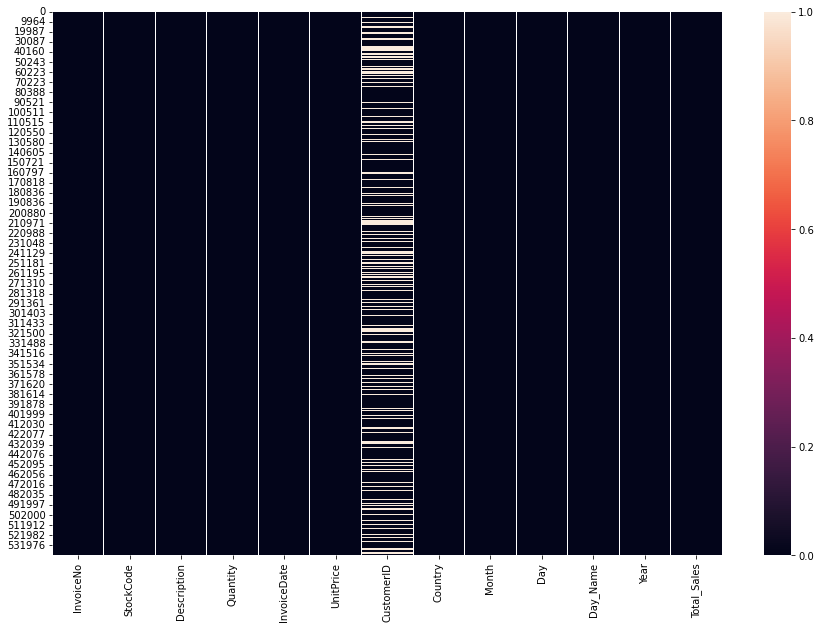

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())#Checking NaN values in dataset using heatmap visualisation

A lot of Nan values are found in the 'CustomerID' feature, which in turn is a unique identifier. So, implementing imputation techniques doesn’t make sense.

In [13]:
df.dropna(inplace=True)# dropping Nan value rows

# Exploratory data analysis & feature engineering

## Description

In [14]:
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index()#Checking for items and the corresponding quantities sold.

Description  Quantity
0             PAPER CRAFT , LITTLE BIRDIE     80995
1          MEDIUM CERAMIC TOP STORAGE JAR     77916
2       WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
3                 JUMBO BAG RED RETROSPOT     46181
4      WHITE HANGING HEART T-LIGHT HOLDER     36725
...                                   ...       ...
3872  BLACK VINT ART DEC CRYSTAL BRACELET         1
3873               FLOWER SHOP DESIGN MUG         1
3874      SET 36 COLOURING PENCILS DOILEY         1
3875            HEN HOUSE W CHICK IN NEST         1
3876    AMBER BERTIE GLASS BEAD BAG CHARM         1

[3877 rows x 2 columns]

There are 3877 items sold from 01/12/2010 to 09/12/2011.

## UnitPrice

Quantity  UnitPrice
Description                                            
POSTAGE                                 3120   8142.750
Manual                                  7179   4161.060
DOTCOM POSTAGE                            16   1599.260
PICNIC BASKET WICKER 60 PIECES            61    649.500
VINTAGE BLUE KITCHEN CABINET              26    295.000
...                                      ...        ...
POPART WOODEN PENCILS ASST              8900      0.120
FOLDING CAMPING SCISSOR W/KNIF & S        30      0.120
PORCELAIN BUDAH INCENSE HOLDER          1501      0.100
WRAP BAD HAIR DAY                        700      0.100
PADS TO MATCH ALL CUSHIONS                 4      0.001

[3877 rows x 2 columns]

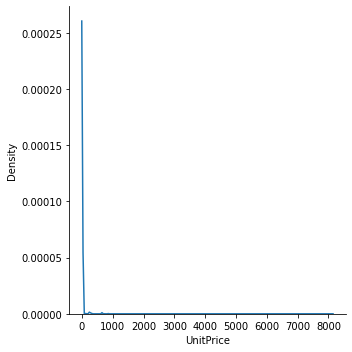

In [15]:
#Checking item wise unit price(top 5 and last 5)
display(pd.concat([df.groupby('Description')['Quantity'].sum(), df.groupby('Description')['UnitPrice'].max()], axis=1).sort_values(by='UnitPrice',ascending=False))

sns.displot(data=(df['UnitPrice']), kind="kde")#Checking unit price distribution


The unit price is ranging from 0.001 to 8142.75.

High positive skewness is observed, Unit price of 75% of items sold is less than 4.

## Total sales

In [16]:
df.sort_values(by='Total_Sales',ascending=False).reset_index()#Checking highest and lowest sales(top 5 and last 5)

index InvoiceNo StockCode                          Description  \
0       540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE   
1        61619    541431     23166       MEDIUM CERAMIC TOP STORAGE JAR   
2       222680    556444     22502       PICNIC BASKET WICKER 60 PIECES   
3       173382    551697      POST                              POSTAGE   
4       348325    567423     23243  SET OF TEA COFFEE SUGAR TINS PANTRY   
...        ...       ...       ...                                  ...   
397919  279324    561284     22167           OVAL WALL MIRROR DIAMANTE    
397920  285657    561916         M                               Manual   
397921  395529    571035         M                               Manual   
397922  439361    574469     22385            JUMBO BAG SPACEBOY DESIGN   
397923   47070    540372     22553               PLASTERS IN TIN SKULLS   

        Quantity InvoiceDate  UnitPrice  CustomerID         Country  Month  \
0          80995  2011-09-12       2.08     16446.0  United Kingdom      9   
1          74215  2011-01-18       1.04     12346.0  United Kingdom      1   
2             60  2011-10-06     649.50     15098.0  United Kingdom     10   
3              1  2011-03-05    8142.75     16029.0  United Kingdom      3   
4           1412  2011-09-20       5.06     17450.0  United Kingdom      9   
...          ...         ...        ...         ...             ...    ...   
397919         1  2011-07-26       0.00     16818.0  United Kingdom      7   
397920         1  2011-01-08       0.00     15581.0  United Kingdom      1   
397921         1  2011-10-13       0.00     12446.0             RSA     10   
397922        12  2011-04-11       0.00     12431.0       Australia      4   
397923        24  2011-06-01       0.00     13081.0  United Kingdom      6   

        Day   Day_Name  Year  Total_Sales  
0        12     Monday  2011    168469.60  
1        18    Tuesday  2011     77183.60  
2         6   Thursday  2011     38970.00  
3         5   Saturday  2011      8142.75  
4        20    Tuesday  2011      7144.72  
...     ...        ...   ...          ...  
397919   26    Tuesday  2011         0.00  
397920    8   Saturday  2011         0.00  
397921   13   Thursday  2011         0.00  
397922   11     Monday  2011         0.00  
397923    1  Wednesday  2011         0.00  

[397924 rows x 14 columns]

Lets check how many items constitute percentage proportion of total sales happened over the year.

In [17]:
def check(val):#A temporary function which returns a dataframe with the no.of items to sales correlation
  temp= pd.DataFrame(columns=['No.of items(%)', 'SALES(%)'])
  for i in range(1,3877):
       tmp=df.groupby('Description')['Total_Sales'].sum().sort_values(ascending=False).head(i).reset_index()['Total_Sales'].sum()/df['Total_Sales'].sum()
       temp=temp.append({'No.of items(%)': round(i*100/3877,2),
                            'SALES(%)' : round(tmp*100,2)},
                         ignore_index = True)
  return temp

In [18]:
temp=check(1)#Implementing same

In [19]:
px.line(temp,x="No.of items(%)",y="SALES(%)",title='Number of items to sales contribution (Considering total sales)')#Visualising the above dataframe

Top 61 sold items (considering total sale) i.e., 1.57% of total items for sale constitute 25.12% of total sales

Top 237 sold items (considering total sale) i.e., 6.11% of total items for sale constitute 50.04% of total sales

Top 658 sold items (considering total sale) i.e., 16.97% of total items for sale constitute 75.02% of total sales

Top 1306 sold items (considering total sale) i.e., 33.69% of total items for sale constitute 90.0% of total sales

## Customer ID

In [20]:
df.groupby('CustomerID')['Total_Sales'].sum().sort_values(ascending=False).reset_index()#Checking for CustomerID and the corresponding total sales.

CustomerID  Total_Sales
0        14646.0    280206.02
1        18102.0    259657.30
2        17450.0    194550.79
3        16446.0    168472.50
4        14911.0    143825.06
...          ...          ...
4334     17956.0        12.75
4335     16454.0         6.90
4336     14792.0         6.20
4337     16738.0         3.75
4338     13256.0         0.00

[4339 rows x 2 columns]

There are 4,339 customers or customer IDs involved in this dataset.

In [21]:
def check(val):#A temporary function which returns a dataframe with the no.of customers to sales correlation
  temp= pd.DataFrame(columns=['CUSTOMERS', 'SALES'])
  for i in range(1,4339):
       tmp=df.groupby('CustomerID')['Total_Sales'].sum().sort_values(ascending=False).head(i).reset_index()['Total_Sales'].sum()/df['Total_Sales'].sum()
       temp=temp.append({'NUMBER OF CUSTOMERS (%)': round(i*100/4339,2),
                            'TOTAL SALES(%)' : round(tmp*100,2)},
                         ignore_index = True)
  return temp

In [22]:
temp=check(1)#Implementing same

In [23]:
#Visualising the above dataframe
px.line(temp,x="NUMBER OF CUSTOMERS (%)",y="TOTAL SALES(%)",title='Number of Customers to sales contribution')

Top 23 customers (considering total sale) i.e., 0.53% of total customers constitute 25.29% of total sales

Top 212 customers (considering total sale) i.e., 4.89% of total customers constitute 50.05% of total sales

Top 885 customers (considering total sale) i.e., 20.4% of total customers constitute 75.01% of total sales

Top 1908 customers (considering total sale) i.e., 43.97% of total customers constitute 90.0% of total sales

## Country

In [24]:
#Analysing countries w.r.t total sales and sales to no. of customer ratio
temp_df=pd.concat([df.groupby('Country')['CustomerID'].count(), df.groupby('Country')['Total_Sales'].sum()], axis=1).rename(columns = {'CustomerID':'No. of customers'})#A temporary dataframe
temp_df['Sales per customer']=temp_df['Total_Sales']/temp_df['No. of customers']#sales to no. of customer ratio

In [25]:
#Creating bar graph from above dataframe
px.bar(data_frame=temp_df.sort_values(by='Sales per customer',ascending=False).reset_index(),
                  width=1200,height=800,
                  x='Sales per customer',y='Country',
                  hover_data=['No. of customers'],color='Total_Sales',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Analysing countries w.r.t total sales and sales per customer')

United kingdom has highest sales and customers.

While considering sales to no of customers, Netherlands, Australia and Japan are at the top

## Month

In [26]:
#Month wise total sales and total number of customers
temp_bar=px.bar(data_frame=pd.concat([df.groupby('Month')['CustomerID'].count(), df.groupby('Month')['Total_Sales'].sum()], axis=1).rename(columns = {'CustomerID':'No. of customers'}).reset_index(),
                y=['Total_Sales','No. of customers'],x='Month',title='Month wise total sales and no. of customer visit')
temp_bar.show()
#Month wise average customer visit and sales
temp_bar=px.bar(data_frame=pd.concat([df.groupby(['Month','Year'])['CustomerID'].count().reset_index().groupby(['Month'])['CustomerID'].mean().astype(int),
                                      df.groupby(['Month','Year'])['Total_Sales'].sum().reset_index().groupby(['Month'])['Total_Sales'].mean().astype(int)]
                                      , axis=1).reset_index().rename(columns = {'CustomerID':'Average customer vist','Total_Sales':'Average Sales'}),
                y=['Average customer vist','Average Sales'],x='Month',title='Month wise average customer visit and sales')
temp_bar.show()

September month had the highest sales and november had the highest average sales.

November month had the highest number of customers and average customer visit.



## Day name

In [27]:
#Day wise total sales and total number of customers
temp_bar=px.bar(data_frame=pd.concat([df.groupby('Day_Name')['CustomerID'].count(), 
                                      df.groupby('Day_Name')['Total_Sales'].sum()], axis=1).rename(columns = {'CustomerID':'No. of customers'}).reset_index(),
                y=['Total_Sales','No. of customers'],
                x='Day_Name',
                title='Day wise total sales and no. of customer visit')
temp_bar.show()
#Day wise average customer visit and sales
temp_bar=px.bar(data_frame=pd.concat([df.groupby(['Day_Name','Year'])['CustomerID'].count().reset_index().groupby(['Day_Name'])['CustomerID'].mean().astype(int),
                                      df.groupby(['Day_Name','Year'])['Total_Sales'].sum().reset_index().groupby(['Day_Name'])['Total_Sales'].mean().astype(int)]
                                      , axis=1).reset_index().rename(columns = {'CustomerID':'Average customer vist','Total_Sales':'Average Sales'}),
                y=['Average customer vist','Average Sales'],
                x='Day_Name',
                title='Month wise average customer visit and sales')
temp_bar.show()

Thursday, followed by Tuesday, has the highest sales, customer visits, average sales and average customer visits.

# Clustering Analysis

## RFM Analysis

**RFM  (recency,  frequency  and  monetary)**  model  is  a behavior-based model used to analyze the behavior of a customer and then    make    predictions   based on the behavior in the database . 

Moreover, **recency** represents the length of a time period since  the  last  purchase,  

while  **frequency**  denotes  the number  of  purchase  within  a  specified time  period .

For **monetary**  , customers are coded by the total or average amount  of money spent during  a  specified  period  of  time.  The  definition  of monetary is defined by the money value that the customer spent in this time period or by the average money amount per  purchase  or  all  purchases  to  date .  

In fact,  these  three variables belong  to  the behavioral  variables and  can  be used as the segmenting variables by observing customer's attitudes toward the product, brand, benefit or even loyalty from the database.

SOURCE:[A review of the application of RFM model](https://www.researchgate.net/publication/228399859_A_review_of_the_application_of_RFM_model)

In this analysis, Monetary feature is the average amount per purchase

* It  is better  to  use  the average  purchase amount  rather  than  the  total  accumulated  purchase amount  so  as  to  reduce  co-linearity  of  frequency  and monetary

In [28]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                       'InvoiceNo': lambda x: len(x), 
                                       'Total_Sales': lambda x: x.mean()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total_Sales': 'Monetary'}, inplace=True)

rfm_df['Total_amount']=rfm_df['Frequency']*rfm_df['Monetary']#Adding total amount feature as well
rfm_df.reset_index()

CustomerID  Recency  Frequency      Monetary  Total_amount
0        12346.0      326          1  77183.600000      77183.60
1        12347.0       40        182     23.681319       4310.00
2        12348.0       76         31     57.975484       1797.24
3        12349.0       19         73     24.076027       1757.55
4        12350.0      311         17     19.670588        334.40
...          ...      ...        ...           ...           ...
4334     18280.0      160         10     18.060000        180.60
4335     18281.0        4          7     11.545714         80.82
4336     18282.0      216         12     14.837500        178.05
4337     18283.0       10        756      2.771005       2094.88
4338     18287.0        0         70     26.246857       1837.28

[4339 rows x 5 columns]

Let’s check how 'Recency', 'Frequency' and 'Monetary' behave with each other

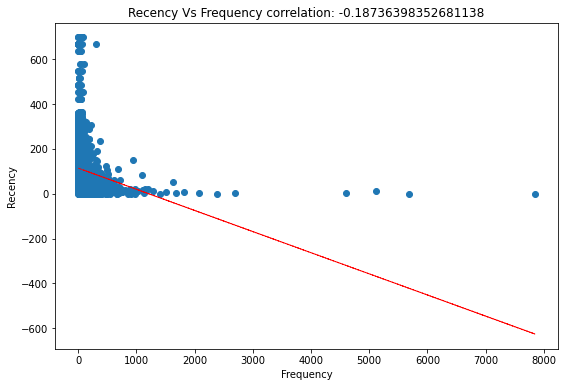

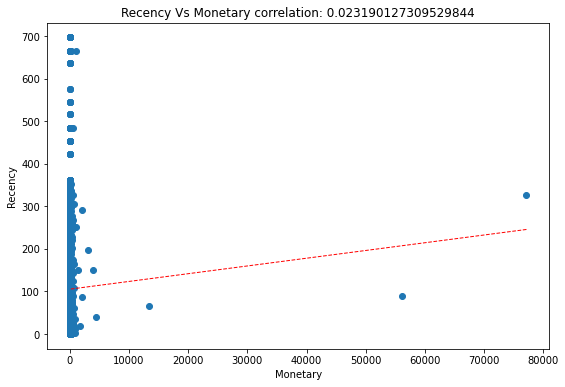

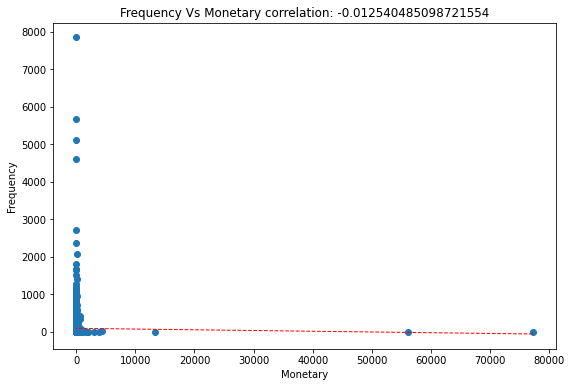

In [29]:
#ploting and calculating correlation score between 'Recency','Frequency' & 'Monetary'
temp_list=['Recency','Frequency','Monetary']
i=0
for tmp in ['Recency','Frequency','Monetary']:
   i=i+1
   for col in temp_list[i:3]:
       fig=plt.figure(figsize=(9,6))
       ax=fig.gca()
       feature=rfm_df[col]
       label=rfm_df[tmp]
       correlation=feature.corr(label)#Calculating correlation
       plt.scatter(x=feature,y=label)#Ploting data
       plt.xlabel(col)
       plt.ylabel(tmp)
       ax.set_title(tmp+' Vs '+col + ' correlation: ' + str(correlation) )
       z=np.polyfit(feature,label,1)
       y_hat=np.poly1d(z)(rfm_df[col])
       plt.plot(rfm_df[col],y_hat,"r--",lw=1)#Line plot
       plt.show()

REMARKS:

•	High correlation is not observed between 'Recency', 'Frequency' and 'Monetary'.

•	The highest correlation value observed is 
   0.187 which is between Recency’ and 
   ‘Frequency’.




The  RFM  model  is  the  most  frequently  adopted segmentation  technique  that comprises  three  measures (recency, frequency and monetary), which  are combined into  a  three-digit  RFM  cell  code,  covering  five  equal quintile  (20%  group).

*   **For  RECENCY**,  customers  are  sorted  by purchase  dates.  Recency  is  commonly  defined  by  the number  of  periods  since  the  last  purchase,  which measures the interval between the most recent transaction time and the analyzing time (days or months), that is, the lower the number of days, the higher the score of recency. A customer having a high score of recency implies that he or she is more likely to make a repeat purchase. The top 20% segment is coded as 5, while the next 20% segment is coded as 4 and so forth. Finally, the recency    for   each customer in the database is denoted by a number from 5 to 1.
*   For  **FREQUENCY**,  the  database  is  sorted  by  purchase frequency  (the number  of purchases)  made in  a  certain time period. The definition of frequency is often simplified to  consider  two  states,  including  single  and  repeated purchases. The top quintile is assigned a value of 5 and the others are given the values of 4, 3, 2 and 1. However, higher frequency score indicates greater customer loyalty. A customer having a high score of frequency implies that he or she has great demand for the product and is more likely to purchase the products repeatedly.

*   For **MONETARY**, customers are coded by the total amount of money spent during  a  specified  period  of  time.  The  definition  of monetary is defined by the dollar value that the customer spent in this time period or by the average dollar amount per  purchase  or  all  purchases  to  date






In [30]:
#Segmenting R, F and M in buckets of 5 and assigning scores.
rfm_df['R'] =  pd.qcut(rfm_df['Recency'], 5, [5,4,3,2,1])
rfm_df['F'] =  pd.qcut(rfm_df['Frequency'], 5, [1,2,3,4,5])
rfm_df['M'] =  pd.qcut(rfm_df['Monetary'], 5, [1,2,3,4,5])
rfm_df.head()

Recency  Frequency      Monetary  Total_amount  R  F  M
CustomerID                                                         
12346.0         326          1  77183.600000      77183.60  1  1  5
12347.0          40        182     23.681319       4310.00  4  5  4
12348.0          76         31     57.975484       1797.24  3  3  5
12349.0          19         73     24.076027       1757.55  4  4  4
12350.0         311         17     19.670588        334.40  1  2  4

Finally, all customers are presented by 555, 554, 553, …, 111, which thus creates 125 (5×5×5) RFM cells. Moreover, the best customer segment is 555, whereas the worst customer segment  is 111. Based  on  the  assigned RFM  behavior  scores,  customers  can  be  grouped  into segments  and  their  profitability  can be  further analyzed

In [31]:
#creating RFM classes
rfm_df['RFM_Class']= rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)
rfm_df=rfm_df.reset_index()
rfm_df

CustomerID  Recency  Frequency      Monetary  Total_amount  R  F  M  \
0        12346.0      326          1  77183.600000      77183.60  1  1  5   
1        12347.0       40        182     23.681319       4310.00  4  5  4   
2        12348.0       76         31     57.975484       1797.24  3  3  5   
3        12349.0       19         73     24.076027       1757.55  4  4  4   
4        12350.0      311         17     19.670588        334.40  1  2  4   
...          ...      ...        ...           ...           ... .. .. ..   
4334     18280.0      160         10     18.060000        180.60  2  1  3   
4335     18281.0        4          7     11.545714         80.82  5  1  2   
4336     18282.0      216         12     14.837500        178.05  1  1  2   
4337     18283.0       10        756      2.771005       2094.88  5  5  1   
4338     18287.0        0         70     26.246857       1837.28  5  4  4   

     RFM_Class  
0          115  
1          454  
2          335  
3          444  
4          124  
...        ...  
4334       213  
4335       512  
4336       112  
4337       551  
4338       544  

[4339 rows x 9 columns]

In [32]:
#bar plot of top 20 customer classes in terms of number of customers
temp_bar=px.bar(data_frame=rfm_df.groupby('RFM_Class')['CustomerID'].count().reset_index().rename(columns = {'CustomerID':'No. of customers'}).sort_values('No. of customers').tail(20),
                y=['No. of customers'],
                x='RFM_Class',
                title='Top 20 customer classes')
temp_bar.show()
#bar plot of last 20 customer classes in terms of number of customers
temp_bar=px.bar(data_frame=rfm_df.groupby('RFM_Class')['CustomerID'].count().reset_index().rename(columns = {'CustomerID':'No. of customers'}).sort_values('No. of customers').head(20),
                y=['No. of customers'],
                x='RFM_Class',
                title='Last 20 customer classes')
temp_bar.show()

REMARKS:

*   115, 551, 215, 451 and 112 are top 5 RFM classes.
*   511, 155, 154, 145 and 255 are last 5 RFM classes.



### RFM class based customer segmentation

The RFM classes are further classified into 9 segments based on,

*   **Loyal Customers   :**Bought recently, buy often and spend the most
*   **Potential Loyalist :**Recent customers, but spent a good amount and bought more than once.
*   **Recent Customers  :** Bought most recently, but not often.
*   **Promising :**Recent shoppers, but haven’t spent much
*   **Customers Needing Attention :**Above average recency, frequency and monetary values. May not have bought very recently though.
*   **About To Sleep :**Below average recency, frequency and monetary values. Will lose them if not reactivated.
*   **At Risk :**Spent big money and purchased often. But long time ago. Need to bring them back!
*   **Can’t Lose Them :**Made biggest purchases, and often. But haven’t returned for a long time.
*   **Lost :**Lowest recency, frequency and monetary scores.



In [33]:
def customer(x):#A function to categories customers into classifications mentioned above
  segment='NA'

  if x in ['555', '545', '455', '445','454','554', '444', '544']:
    segment='Loyal Customers'

  elif x in ['524', '525', '535', '534','551']:
    segment='Potential Loyalist'

  elif x in ['515', '514','522','511']:
    segment='Recent Customers'

  elif x in ['513', '523','512','533','414']:
    segment='Promising'

  elif x in ['333', '323', '334', '324','433','343']:
    segment='Customers Needing Attention'

  elif x in ['222', '221','212','122','223','322','232','123','131','132','311','411','215','213','113','312']:
    segment='About To Sleep'

  elif x in ['154', '254', '354','344','244','144']:
    segment='At Risk'

  elif x in ['145', '155','255','245','135','144', '354','355']:
    segment='Can’t Lose Them'

  elif x in ['111','112', '121', '211']:
    segment='Lost'

  return segment

In [34]:
#Creating 'customer' column for customer classification
rfm_df['customer']=rfm_df['RFM_Class'].apply(customer)
rfm_df.head()

CustomerID  Recency  Frequency      Monetary  Total_amount  R  F  M  \
0     12346.0      326          1  77183.600000      77183.60  1  1  5   
1     12347.0       40        182     23.681319       4310.00  4  5  4   
2     12348.0       76         31     57.975484       1797.24  3  3  5   
3     12349.0       19         73     24.076027       1757.55  4  4  4   
4     12350.0      311         17     19.670588        334.40  1  2  4   

  RFM_Class         customer  
0       115               NA  
1       454  Loyal Customers  
2       335               NA  
3       444  Loyal Customers  
4       124               NA

In [35]:
#Pie chart visualisation of customer category percentage distribution  w.r.t total amount
temp=px.pie(rfm_df.groupby('customer')['Total_amount'].sum().reset_index(), 
          values='Total_amount',
          names='customer',
          title='Customer category percentage distribution  w.r.t total amount')
temp.show()

#Pie chart visualisation of Customer category percentage distribution w.r.t number of customers
temp=px.pie(rfm_df.groupby('customer')['CustomerID'].count().reset_index(), 
          values='CustomerID',
          names='customer',
          title='Customer category percentage distribution w.r.t number of customers')
temp.show()

#3d visualisation of data using Recency, Frequency and Monetary score
temp = px.scatter_3d(rfm_df, 
                    x = 'Recency', 
                    y = 'Frequency', 
                    z = 'Monetary',
                    hover_data=['customer'],
                    title='Segmentation using customer classification',
                    color = 'customer')
temp.show()

#3d visualisation of data using R, F and M score
temp = px.scatter_3d(rfm_df, 
                    x = 'R', 
                    y = 'F', 
                    z = 'M',
                    hover_data=['customer'],
                    title='Segmentation using customer classification',
                    color = 'customer')
temp.show()

REMARKS:

*   loyal customers i.e.,8.4% of customers are responsible for 45% of total sales



### RFM composite score based customer segmentation

For further analysis, a new feature i.e., 'RFM_Score' which is sum or weighted sum of R, F and M scores.

In this project weighted sum is used i.e.,  RFM_Score= 3*R + 2*F + M.

Higher weightage is given to recency because the most important factor in identifying customers who are likely to respond to a new offer is recency. Customers who purchased more recently are more likely to purchase again than are customers who purchased further in the past

In [36]:
rfm_df['RFM_Score']= 3*rfm_df['R'].astype(int) + 2*rfm_df['F'].astype(int) + rfm_df['M'].astype(int)#calculating RFM composite score
rfm_df

CustomerID  Recency  Frequency      Monetary  Total_amount  R  F  M  \
0        12346.0      326          1  77183.600000      77183.60  1  1  5   
1        12347.0       40        182     23.681319       4310.00  4  5  4   
2        12348.0       76         31     57.975484       1797.24  3  3  5   
3        12349.0       19         73     24.076027       1757.55  4  4  4   
4        12350.0      311         17     19.670588        334.40  1  2  4   
...          ...      ...        ...           ...           ... .. .. ..   
4334     18280.0      160         10     18.060000        180.60  2  1  3   
4335     18281.0        4          7     11.545714         80.82  5  1  2   
4336     18282.0      216         12     14.837500        178.05  1  1  2   
4337     18283.0       10        756      2.771005       2094.88  5  5  1   
4338     18287.0        0         70     26.246857       1837.28  5  4  4   

     RFM_Class            customer  RFM_Score  
0          115                  NA         10  
1          454     Loyal Customers         26  
2          335                  NA         20  
3          444     Loyal Customers         24  
4          124                  NA         11  
...        ...                 ...        ...  
4334       213      About To Sleep         11  
4335       512           Promising         19  
4336       112                Lost          7  
4337       551  Potential Loyalist         26  
4338       544     Loyal Customers         27  

[4339 rows x 11 columns]

Based on RFM score calculated above customers are being classified into 5 graded groups i.e, ['C','B', 'B+', 'A', 'A+'].

In [37]:
#Classifying on basis of RFM_score to Grade 
Customer_grade = ['C','B', 'B+', 'A', 'A+']
Score_cuts = pd.qcut(rfm_df.RFM_Score, q = 5, labels = Customer_grade) #spliting into 5 quantile
rfm_df['Customer_grade'] = Score_cuts.values
rfm_df=rfm_df.reset_index()
rfm_df.head()

index  CustomerID  Recency  Frequency      Monetary  Total_amount  R  F  M  \
0      0     12346.0      326          1  77183.600000      77183.60  1  1  5   
1      1     12347.0       40        182     23.681319       4310.00  4  5  4   
2      2     12348.0       76         31     57.975484       1797.24  3  3  5   
3      3     12349.0       19         73     24.076027       1757.55  4  4  4   
4      4     12350.0      311         17     19.670588        334.40  1  2  4   

  RFM_Class         customer  RFM_Score Customer_grade  
0       115               NA         10              C  
1       454  Loyal Customers         26             A+  
2       335               NA         20             B+  
3       444  Loyal Customers         24              A  
4       124               NA         11              C

In [38]:
#Pie chart visualisation of customer grade  w.r.t total amount
temp=px.pie(rfm_df.groupby('Customer_grade')['Total_amount'].sum().reset_index(), 
          values='Total_amount',
          names='Customer_grade',
          title='customer grade percentage distribution  w.r.t total amount')
temp.show()
#Pie chart visualisation of Customer grade  w.r.t number of customers
temp=px.pie(rfm_df.groupby('Customer_grade')['CustomerID'].count().reset_index(), 
          values='CustomerID',
          names='Customer_grade',
          title='customer grade percentage distribution w.r.t number of customers')
temp.show()
#3d visualisation of data using customer grade
temp = px.scatter_3d(rfm_df, 
                    x = 'Recency', 
                    y = 'Frequency', 
                    z = 'Monetary',
                    hover_data=['Customer_grade'],
                    title='Segmentation using customer grade',
                    color = 'Customer_grade')
temp.show()
#3d visualisation of data using customer grade
temp = px.scatter_3d(rfm_df, 
                    x = 'R', 
                    y = 'F', 
                    z = 'M',
                    hover_data=['Customer_grade'],
                    title='Segmentation using customer grade',
                    color = 'Customer_grade')
temp.show()

REMARKS:

* A+ graded customers i.e., 18% of customers are responsible for 60% of total sales.

## Data Prepping

In [39]:
rfm_df_1=rfm_df.copy()#For further analysis copy of rfm_df will be used

<Figure size 648x432 with 0 Axes>

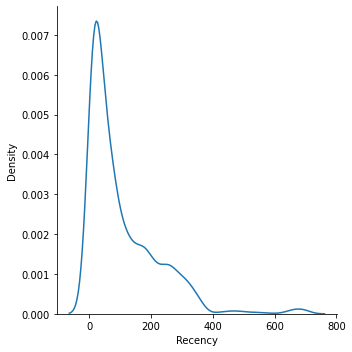

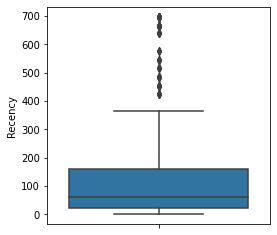

<Figure size 648x432 with 0 Axes>

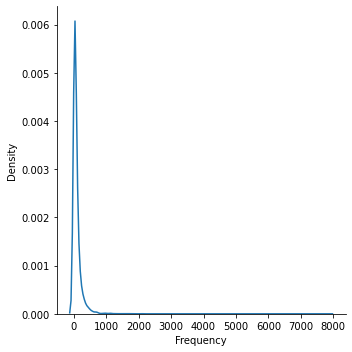

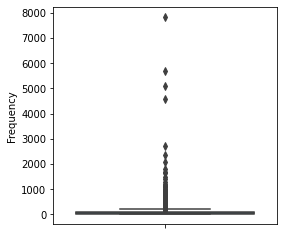

<Figure size 648x432 with 0 Axes>

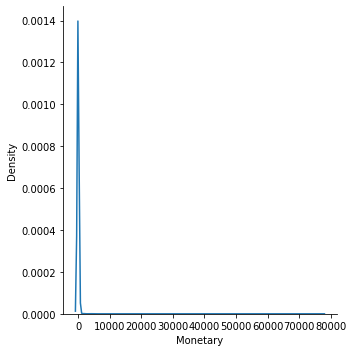

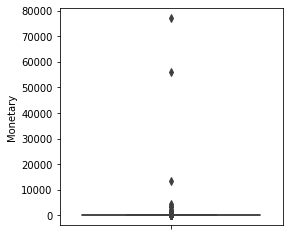

In [40]:
#lets check distribution and outliers in 'Recency','Frequency' and 'Monetary' features
for x in ['Recency','Frequency','Monetary']:
    fig = plt.figure(figsize=(9, 6))
    sns.displot(data=(rfm_df_1[x]), kind="kde")#For distribution analysis
    plt.show()
    plt.figure(figsize=(4,4))
    fig=sns.boxplot(y=(rfm_df_1[x]))#For outlier analysis
    fig.set_title('')
    fig.set_ylabel(x)
    plt.show()

Frequency and monetary features have high skewness, and all features have outliers. In order to handle this, log transformation is implemented.

In [41]:
#Let's check if the feature contains any zero values
rfm_df_1[(rfm_df_1['Recency']<=0) | (rfm_df_1['Frequency']<=0) | (rfm_df_1['Monetary']<=0)]

index  CustomerID  Recency  Frequency   Monetary  Total_amount  R  F  M  \
30       30     12381.0        0         87  21.210460       1845.31  5  4  4   
79       79     12444.0        0        177  28.279435       5005.46  5  5  4   
137     137     12518.0        0        124  16.587823       2056.89  5  5  3   
165     165     12553.0        0        191  19.331309       3692.28  5  5  3   
177     177     12569.0        0        188  21.939840       4124.69  5  5  4   
...     ...         ...      ...        ...        ...           ... .. .. ..   
4083   4083     17934.0        0         21  33.535714        704.25  5  2  5   
4252   4252     18171.0        0         54  22.802037       1231.31  5  3  4   
4298   4298     18229.0        0        164  44.371341       7276.90  5  5  5   
4332   4332     18277.0        0          8  13.797500        110.38  5  1  2   
4338   4338     18287.0        0         70  26.246857       1837.28  5  4  4   

     RFM_Class            customer  RFM_Score Customer_grade  
30         544     Loyal Customers         27             A+  
79         554     Loyal Customers         29             A+  
137        553                  NA         28             A+  
165        553                  NA         28             A+  
177        554     Loyal Customers         29             A+  
...        ...                 ...        ...            ...  
4083       525  Potential Loyalist         24              A  
4252       534  Potential Loyalist         25             A+  
4298       555     Loyal Customers         30             A+  
4332       512           Promising         19             B+  
4338       544     Loyal Customers         27             A+  

[74 rows x 13 columns]

74 rows contain zero values, these values are converted to 1 because it will affect the log transformation.

In [42]:
#Converting zero values to one
rfm_df_1['Recency']=rfm_df_1['Recency'].apply(lambda x:1 if x<=0 else x)
rfm_df_1['Monetary']=rfm_df_1['Monetary'].apply(lambda x:1 if x<=0 else x)
rfm_df_1['Frequency']=rfm_df_1['Frequency'].apply(lambda x:1 if x<=0 else x)

<Figure size 648x432 with 0 Axes>

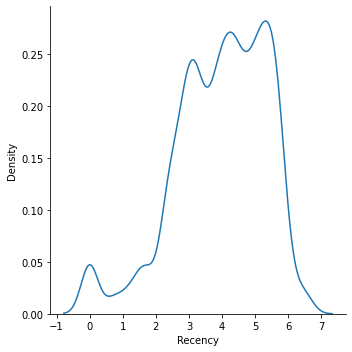

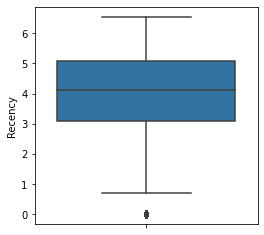

<Figure size 648x432 with 0 Axes>

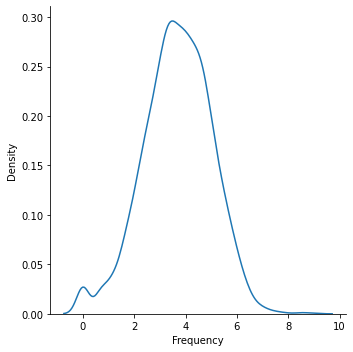

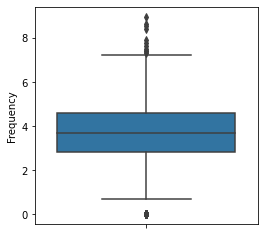

<Figure size 648x432 with 0 Axes>

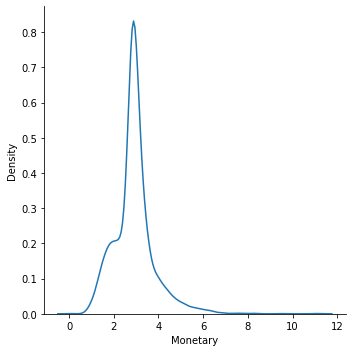

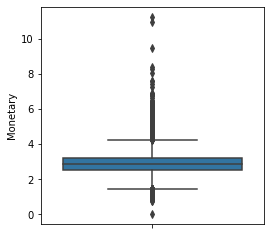

In [43]:
#let's check the distribution and outlier presence after log transformation
for x in ['Recency','Frequency','Monetary']:
    fig = plt.figure(figsize=(9, 6))
    sns.displot(data=np.log(rfm_df_1[x]), kind="kde")#distribution
    plt.show()
    plt.figure(figsize=(4,4))
    fig=sns.boxplot(y=np.log(rfm_df_1[x]))#outlier
    fig.set_title('')
    fig.set_ylabel(x)
    plt.show()

In [44]:
rfm_df_1[rfm_df_1.Monetary>2000]#lets check how many rows have monetary value greater than 2,000

index  CustomerID  Recency  Frequency  Monetary  Total_amount  R  F  M  \
0         0     12346.0      326          1  77183.60      77183.60  1  1  5   
597     597     13135.0      197          1   3096.00       3096.00  1  1  5   
2012   2012     15098.0       65          3  13305.50      39916.50  3  1  5   
2088   2088     15195.0      151          1   3861.00       3861.00  2  1  5   
2503   2503     15749.0       39         10   4453.43      44534.30  4  1  5   
3009   3009     16446.0       89          3  56157.50     168472.50  2  1  5   
4014   4014     17846.0       86          1   2033.10       2033.10  3  1  5   
4192   4192     18087.0      291          2   2027.86       4055.72  1  1  5   

     RFM_Class        customer  RFM_Score Customer_grade  
0          115              NA         10              C  
597        115              NA         10              C  
2012       315              NA         16              B  
2088       215  About To Sleep         13              B  
2503       415              NA         19             B+  
3009       215  About To Sleep         13              B  
4014       315              NA         16              B  
4192       115              NA         10              C

After log transformation, a good number of outliers are observed in the monetary feature. In order to reduce those, capping is implemented.

Rows with a monetary value greater than 2,000 are omitted from the dataset.


In [45]:
rfm_df_1=rfm_df_1[rfm_df_1.Monetary<2000]#Implementing the same

In [46]:
#Implementing log transformation
rfm_df_1['Recency_log']=np.log(rfm_df_1['Recency'])
rfm_df_1['Monetary_log']=np.log(rfm_df_1['Monetary'])
rfm_df_1['Frequency_log']=np.log(rfm_df_1['Frequency'])

In [47]:
x=rfm_df_1[['Recency_log','Frequency_log','Monetary_log']]#Initialising x for further clustering analysis

In [48]:
#Scaling data using StandardScaler() since all the features are having different measure scale
scaler = StandardScaler()
#Implementing StandardScaler() on train and test data
X = scaler.fit_transform(x)

## K-Means clustering

In [49]:
sum_of_sq_dist = {}#Initialising dict variable for appending K value and corresponding sum of square distance
#Implementing K means clustering
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

Lets check the optimum value of K using elbow method

In [50]:
#Plot the graph for the sum of square distance values and Number of Clusters
px.line(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),labels={'x': 'Number of Clusters(k)','y':'Sum of Square Distances'},title='Elbow Method For Optimal k')

* Elbow method suggest 2 followed by 3 as optimum K values

Lets check the optimum value of K using silhouette analysis

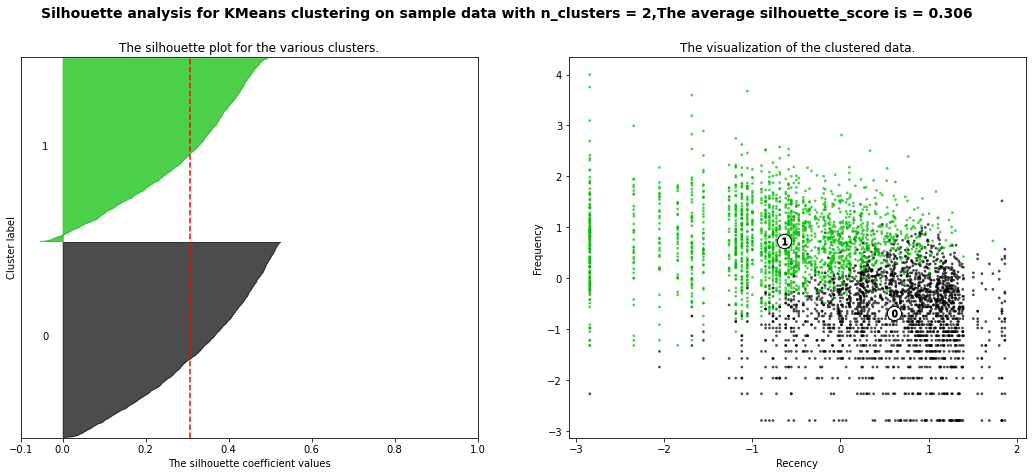

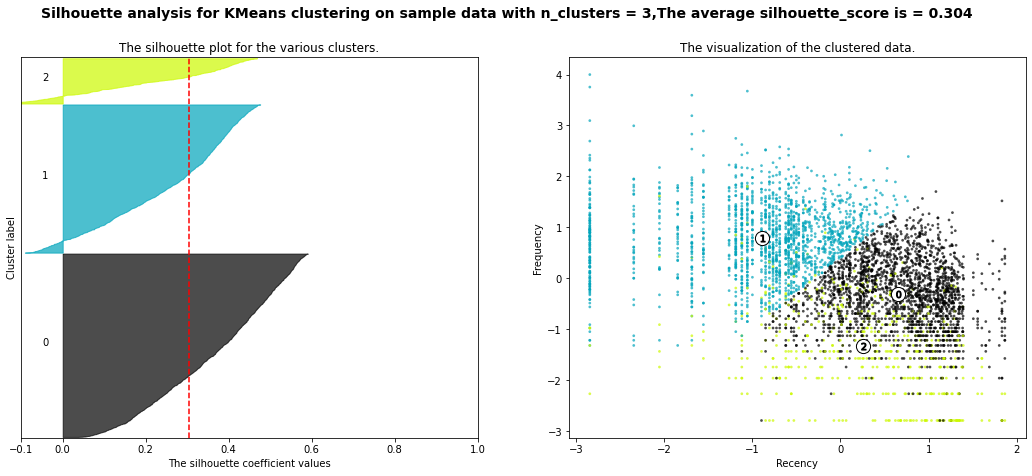

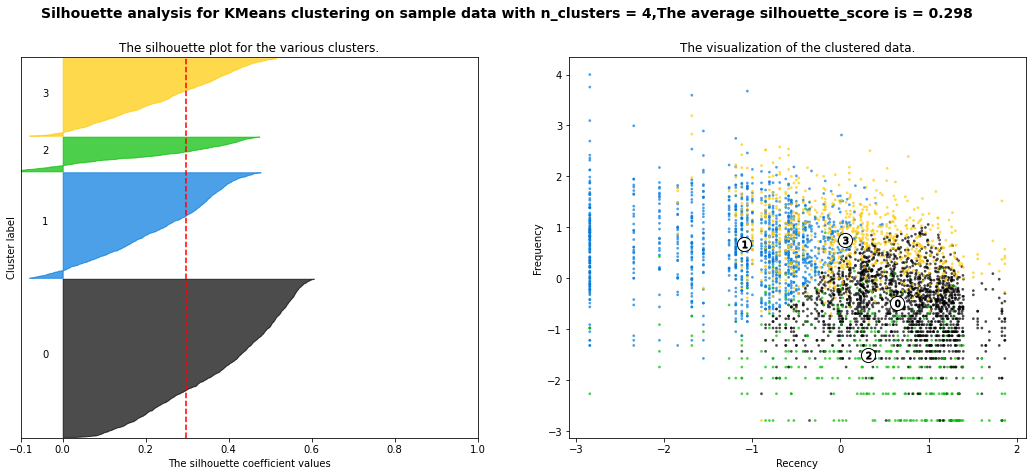

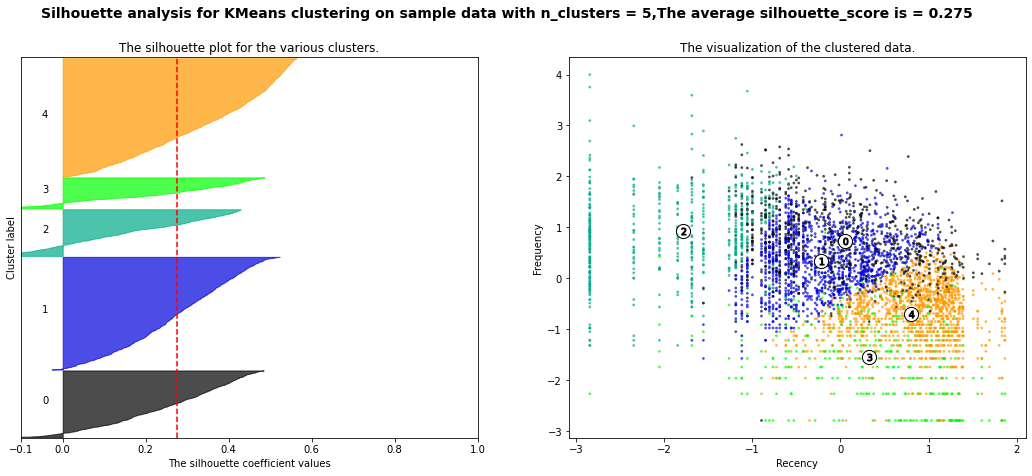

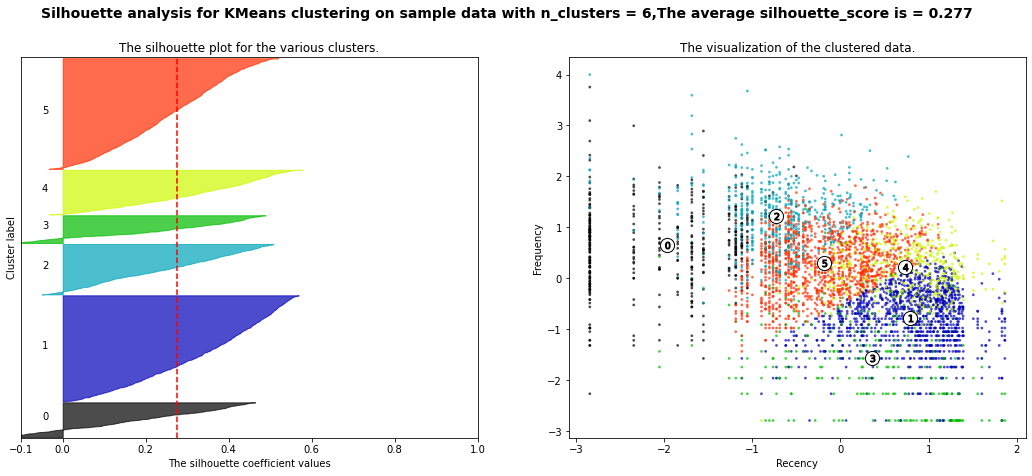

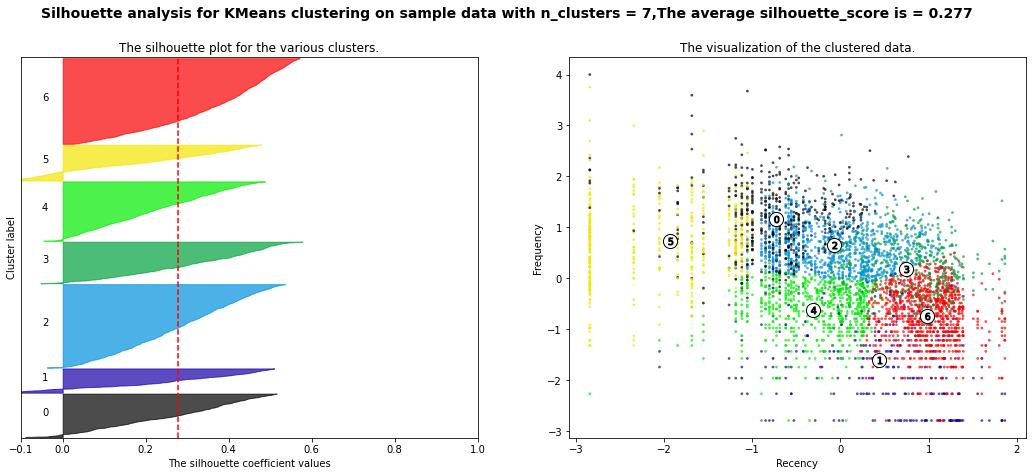

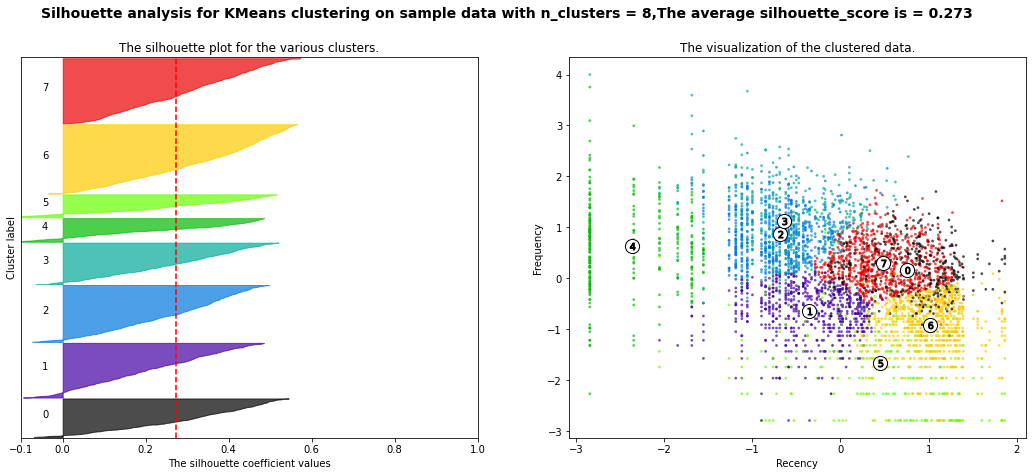

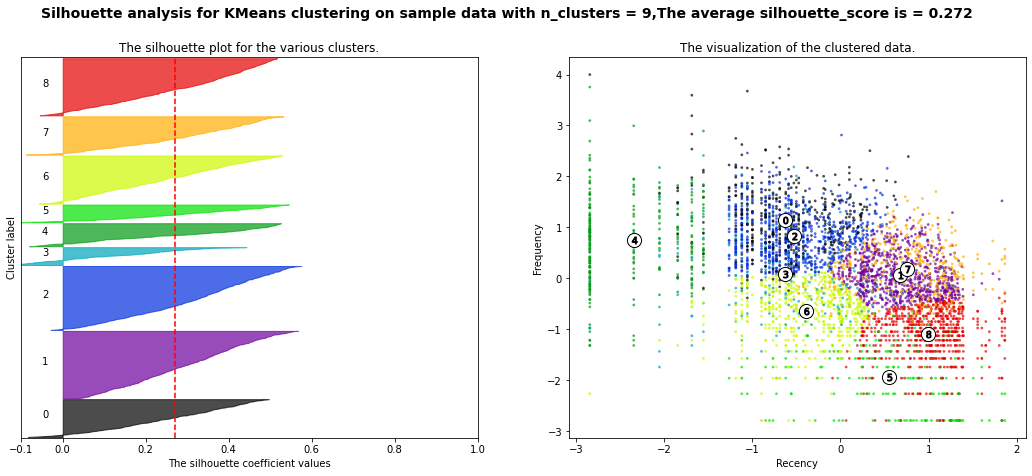

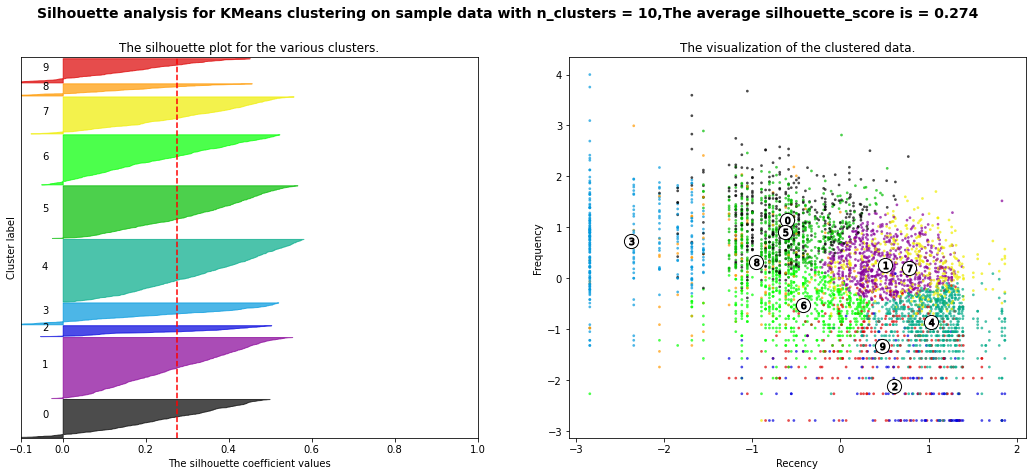

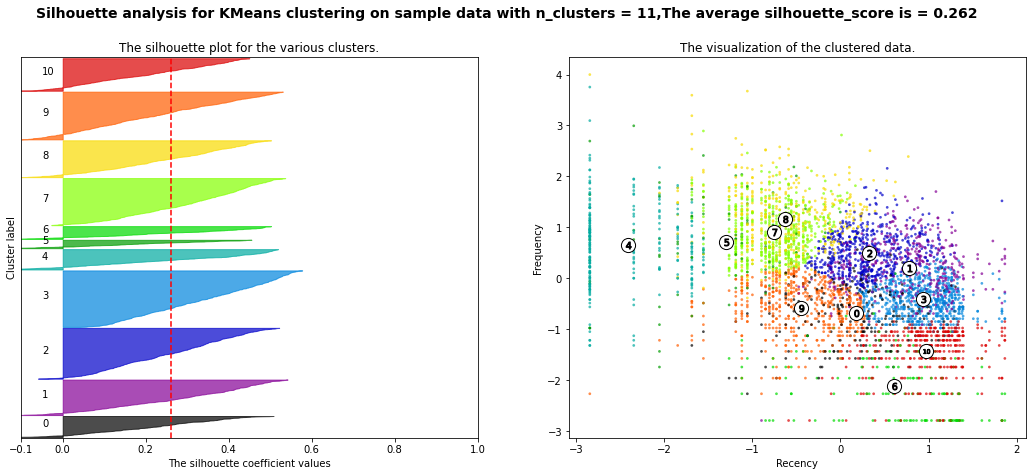

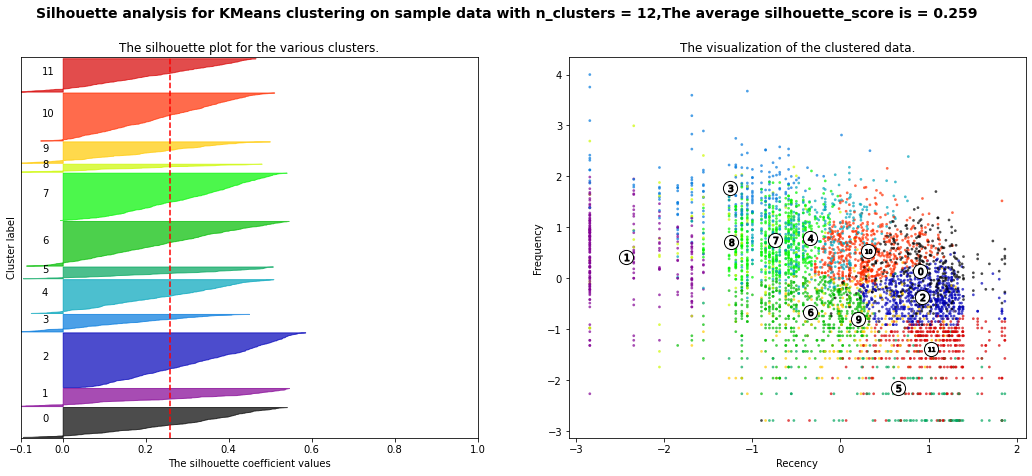

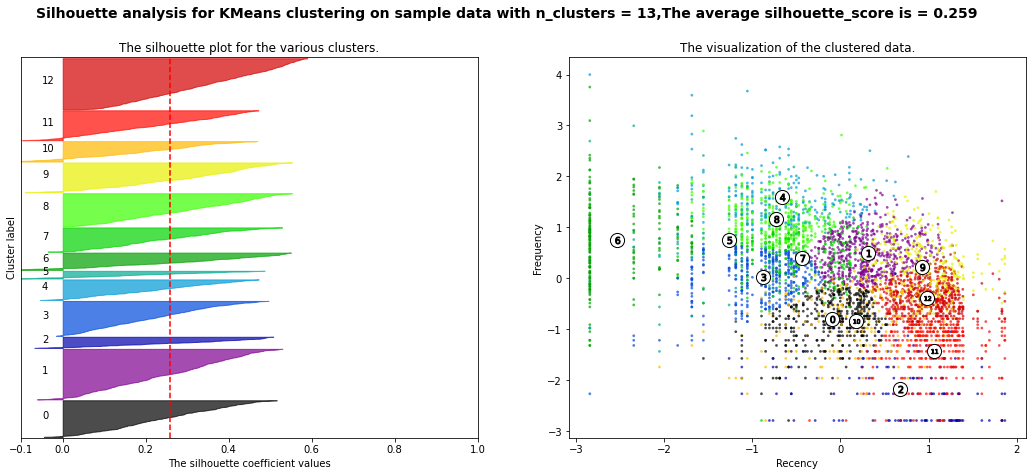

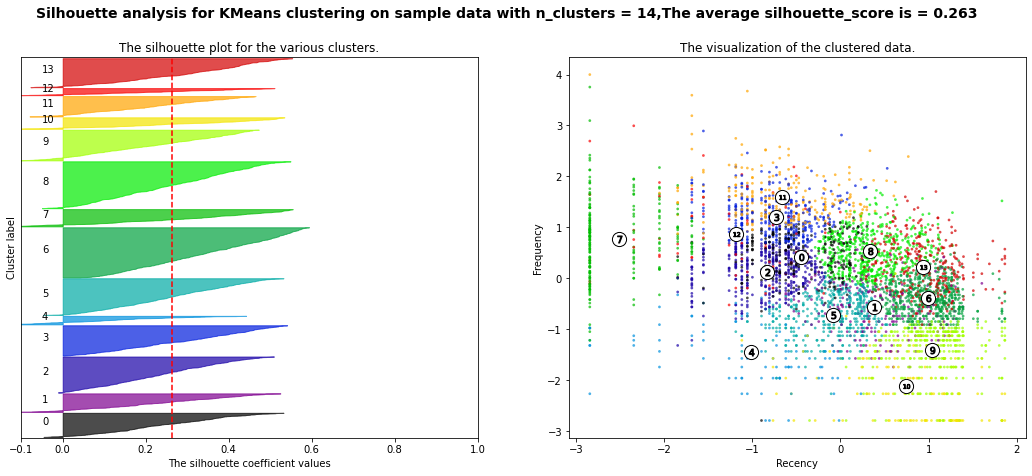

In [51]:
silhouette_dist = {}
for n_clusters in range(2,15):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_dist[n_clusters] = silhouette_avg
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Recency")
    ax2.set_ylabel("Frequency")
    plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters},The average silhouette_score is = {round(silhouette_avg,3)}", fontsize=14, fontweight='bold')

plt.show()

In [52]:
#Plot the graph for the silhouette score and Number of Clusters
px.line(x = list(silhouette_dist.keys()), y = list(silhouette_dist.values()),labels={'x': 'Number of Clusters(k)','y':'The average silhouette score'},title='silhouette score For Optimal k')

REMARKS:

* silhouette method suggest 2 followed by 3 as optimum K values.

Even though Both silhouette and elbow methods prefer k value 2 a bit higher than 3. But for further analysis, both K values are being used.

In [53]:
#Fitting K-Mean model
KMean_clust_2 = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000,random_state=42)#For K value 2
KMean_clust_2.fit(X)
KMean_clust_3 = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000,random_state=42)#For K value 3
KMean_clust_3.fit(X)
#Find the clusters for the observation given in the dataset
rfm_df_1['K_mean_Cluster_2'] = KMean_clust_2.labels_#Column for 2 clusters
rfm_df_1['K_mean_Cluster_3'] = KMean_clust_3.labels_#Column for 3 clusters
rfm_df_1.head()

index  CustomerID  Recency  Frequency   Monetary  Total_amount  R  F  M  \
1      1     12347.0       40        182  23.681319       4310.00  4  5  4   
2      2     12348.0       76         31  57.975484       1797.24  3  3  5   
3      3     12349.0       19         73  24.076027       1757.55  4  4  4   
4      4     12350.0      311         17  19.670588        334.40  1  2  4   
5      5     12352.0       73         85  29.482824       2506.04  3  4  5   

  RFM_Class         customer  RFM_Score Customer_grade  Recency_log  \
1       454  Loyal Customers         26             A+     3.688879   
2       335               NA         20             B+     4.330733   
3       444  Loyal Customers         24              A     2.944439   
4       124               NA         11              C     5.739793   
5       345               NA         22              A     4.290459   

   Monetary_log  Frequency_log  K_mean_Cluster_2  K_mean_Cluster_3  
1      3.164686       5.204007                 1                 0  
2      4.060020       3.433987                 0                 2  
3      3.181217       4.290459                 1                 0  
4      2.979125       2.833213                 0                 1  
5      3.383808       4.442651                 1                 1

### Kmeans clustering (k=2)

In [54]:
#3d visualisation for Kmeans clustering (k=2)
Kmeans_Cluster = px.scatter_3d(rfm_df_1, 
                    x = 'Recency', 
                    y = 'Frequency', 
                    z = 'Monetary',
                    hover_data=['customer','K_mean_Cluster_2'],
                    title='3d visualisation for Kmeans clustering (k=2)',
                    color = 'K_mean_Cluster_2')

Kmeans_Cluster.show()

#3d visualisation of data using R, F and M score
temp = px.scatter_3d(rfm_df_1, 
                    x = 'R', 
                    y = 'F', 
                    z = 'M',
                    hover_data=['K_mean_Cluster_2'],
                    title='3d visualisation for Kmeans clustering (k=2)',
                    color = 'K_mean_Cluster_2')
temp.show()

Let's analyse w.r.t customer classification made using RFM classes.

In [55]:
#Creating a temp df of cluster wise customer classification distribution
temp_df=rfm_df_1.groupby(['customer','K_mean_Cluster_2'])['CustomerID'].sum().rename("Percentage").groupby(level = 0).transform(lambda x: (x*100)/x.sum()).reset_index()
#Creating bar graph from above dataframe
fig=px.bar(data_frame=temp_df,
                  width=1000,height=800,
                  x='Percentage',y='customer',
                  hover_data=['Percentage'],color='K_mean_Cluster_2',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Analysing customer classification w.r.t K means clusters(K=2)')
fig.show()

#Barplot for analysing customer classification w.r.t data filtered from boundary RFM classes.
temp_df=rfm_df_1.groupby(['Customer_grade','K_mean_Cluster_2'])['CustomerID'].sum().rename("Percentage").groupby(level = 0).transform(lambda x: x/x.sum()).reset_index()
#Creating bar graph from above dataframe
px.bar(data_frame=temp_df,
                  width=1000,height=800,
                  x='Percentage',y='Customer_grade',
                  hover_data=['Percentage'],color='K_mean_Cluster_2',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Analysing Customer grade w.r.t data filtered from boundary RFM classes')

REMARKS:

*   K means using K=2 is able to distinguish clearly between 'lost' and 'Loyal Customer' category.
*   The first cluster contains all customers classified as 'Lost', 76% of customers classified as 'Can't Lose them' and 98% of customers classified as 'About to Sleep'.

*   The second cluster contains 98% of all customers classified as 'Loyal customer' and 91% of customers classified as 'Potential Loyalist'.
*   Considering customer grade, the first cluster mainly contains high-graded customers and the second cluster contains mostly low-grade customers.

**For the subsequent analysis, RFM classes that are distributed between both clusters are dropped. The intention of doing this was to comprehend the clusters a bit better.**

In [56]:
#Creating a temporary df to identify RFM classes that are in all the clusters
tmp=rfm_df_1.groupby(['RFM_Class','K_mean_Cluster_2'])['CustomerID'].count().reset_index()
dff=tmp.groupby(['RFM_Class','K_mean_Cluster_2'])['CustomerID'].count().reset_index()
fg=dff.groupby('RFM_Class').agg({'K_mean_Cluster_2': lambda x: x.sum(),'CustomerID': lambda x: x.sum()}).reset_index()
tg=fg[fg['CustomerID']==1]

t=list(tg['RFM_Class'])#RFM classes that are part of only one cluster
len(t)

88

Out of 124(4331 customers) RFM classes, 88(3338 customers) RFM classes are present only in one cluster.

In [57]:
#3d visualisation for agglomerative clustering
Kmeans_Cluster = px.scatter_3d(rfm_df_1[rfm_df_1['RFM_Class'].isin(t)], 
                    x = 'Recency', 
                    y = 'Frequency', 
                    z = 'Monetary',
                    hover_data=['customer'],
                    title='3d visualisation for Kmeans clustering K=2 after boundary RFM class filtering',
                    color = 'K_mean_Cluster_2')
Kmeans_Cluster.show()

#3d visualisation of data using R, F and M score
temp = px.scatter_3d(rfm_df_1[rfm_df_1['RFM_Class'].isin(t)], 
                    x = 'R', 
                    y = 'F', 
                    z = 'M',
                    hover_data=['customer'],
                    title='3d visualisation for Kmeans clustering K=2 after boundary RFM class filtering',
                    color = 'K_mean_Cluster_2')
temp.show()

Let's again analyse w.r.t customer classification based on RFM classes and composite score.

In [58]:
#Barplot for analysing customer classification w.r.t data filtered from boundary RFM classes.
gh=rfm_df_1[rfm_df_1['RFM_Class'].isin(t)]
temp_df=gh.groupby(['customer','K_mean_Cluster_2'])['CustomerID'].sum().rename("Percentage").groupby(level = 0).transform(lambda x: x/x.sum()).reset_index()
#Creating bar graph from above dataframe
fig=px.bar(data_frame=temp_df,
                  width=1000,height=800,
                  x='Percentage',y='customer',
                  hover_data=['Percentage'],color='K_mean_Cluster_2',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Analysing customer classification w.r.t data filtered from boundary RFM classes')
fig.show()
#Barplot for analysing customer classification w.r.t data filtered from boundary RFM classes.
gh=rfm_df_1[rfm_df_1['RFM_Class'].isin(t)]
temp_df=gh.groupby(['Customer_grade','K_mean_Cluster_2'])['CustomerID'].sum().rename("Percentage").groupby(level = 0).transform(lambda x: x/x.sum()).reset_index()
#Creating bar graph from above dataframe
px.bar(data_frame=temp_df,
                  width=1000,height=800,
                  x='Percentage',y='Customer_grade',
                  hover_data=['Percentage'],color='K_mean_Cluster_2',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Analysing Customer grade w.r.t data filtered from boundary RFM classes')

REMARKS:

*   The first cluster contains all customers classified as 'Lost' and 'About to Sleep'.

*   The second cluster contains all customers classified as 'Loyal customer' and 'Potential Loyalist'.
*   Considering customer grade, the first cluster mainly contains high-graded customers and the second cluster contains mostly low-grade customers.





### Kmeans clustering (k=3)

In [59]:
#3d visualisation for Kmeans clustering (k=3)
Kmeans_Cluster = px.scatter_3d(rfm_df_1, 
                    x = 'Recency', 
                    y = 'Frequency', 
                    z = 'Monetary',
                    hover_data=['customer','K_mean_Cluster_3'],
                    title='3d visualisation for Kmeans clustering (k=3)',
                    color = 'K_mean_Cluster_3')
Kmeans_Cluster.show()

#3d visualisation of data using R, F and M score
temp = px.scatter_3d(rfm_df_1, 
                    x = 'R', 
                    y = 'F', 
                    z = 'M',
                    hover_data=['K_mean_Cluster_3'],
                    title='3d visualisation for Kmeans clustering (k=3)',
                    color = 'K_mean_Cluster_3')
temp.show()

Let's analyse w.r.t customer classification made using RFM classes.

In [60]:
#Creating a temp df of cluster wise customer classification distribution
temp_df=rfm_df_1.groupby(['customer','K_mean_Cluster_3'])['CustomerID'].sum().rename("Percentage").groupby(level = 0).transform(lambda x: (x*100)/x.sum()).reset_index()
#Creating bar graph from above dataframe
temp=px.bar(data_frame=temp_df,
                  width=1000,height=800,
                  x='Percentage',y='customer',
                  hover_data=['Percentage'],color='K_mean_Cluster_3',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Analysing customer classification w.r.t K means clusters(K=3)')
temp.show()
#Creating a temp df of cluster wise customer classification distribution
temp_df=rfm_df_1.groupby(['Customer_grade','K_mean_Cluster_3'])['CustomerID'].sum().rename("Percentage").groupby(level = 0).transform(lambda x: (x*100)/x.sum()).reset_index()
#Creating bar graph from above dataframe
temp=px.bar(data_frame=temp_df,
                  width=1000,height=800,
                  x='Percentage',y='Customer_grade',
                  hover_data=['Percentage'],color='K_mean_Cluster_3',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Analysing Customer grade w.r.t K means clusters(K=3)')
temp.show()

REMARKS:

*   The first cluster contains all customers classified as 'Lost' and 87% of customers classified as 'About to Sleep'.
*   The second cluster contains 94% of customers classified as 'Loyal customer' and 91% of customers classified as 'Potential Loyalist'.
*   No such major distribution is observed in the third cluster. One of the reasons may be because around 50% of total customers were able to classify based on RFM classes
*   Considering customer grade, the first cluster mainly contains high-graded customers and the second cluster contains mostly low-grade customers.

**For the subsequent analysis, RFM classes that are distributed between both clusters are dropped. The intention of doing this was to comprehend the clusters a bit better.**

In [61]:
#Creating a temporary df to identify RFM classes that are in all the clusters
tmp=rfm_df_1.groupby(['RFM_Class','K_mean_Cluster_3'])['CustomerID'].count().reset_index()
dff=tmp.groupby(['RFM_Class','K_mean_Cluster_3'])['CustomerID'].count().reset_index()
fg=dff.groupby('RFM_Class').agg({'K_mean_Cluster_3': lambda x: x.sum(),'CustomerID': lambda x: x.sum()}).reset_index()
tg=fg[fg['CustomerID']==1]

t=list(tg['RFM_Class'])#RFM classes that are part of only one cluster
len(t)

74

Out of 124(4331 customers) RFM classes, 74(2677 customers) RFM classes belongs only in one cluster.

In [62]:
#3d visualisation for agglomerative clustering
Kmeans_Cluster = px.scatter_3d(rfm_df_1[rfm_df_1['RFM_Class'].isin(t)], 
                    x = 'Recency', 
                    y = 'Frequency', 
                    z = 'Monetary',
                    hover_data=['customer'],
                    title='3d visualisation for Kmeans clustering K=3 after boundary RFM class filtering',
                    color = 'K_mean_Cluster_3')
Kmeans_Cluster.show()

#3d visualisation of data using R, F and M score
temp = px.scatter_3d(rfm_df_1[rfm_df_1['RFM_Class'].isin(t)], 
                    x = 'R', 
                    y = 'F', 
                    z = 'M',
                    hover_data=['customer'],
                    title='3d visualisation for Kmeans clustering K=3 after boundary RFM class filtering',
                    color = 'K_mean_Cluster_3')
temp.show()

Let's again analyse w.r.t customer classification based on RFM classes and composite score.

In [63]:
#Barplot for analysing customer classification w.r.t data filtered from boundary RFM classes.
gh=rfm_df_1[rfm_df_1['RFM_Class'].isin(t)]
temp_df=gh.groupby(['customer','K_mean_Cluster_3'])['CustomerID'].count().rename("Percentage").groupby(level = 0).transform(lambda x: x*100/x.sum()).reset_index()
#Creating bar graph from above dataframe
temp=px.bar(data_frame=temp_df,
                  width=1000,height=800,
                  x='Percentage',y='customer',
                  hover_data=['Percentage'],color='K_mean_Cluster_3',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Analysing customer classification w.r.t data filtered from boundary RFM classes')
temp.show()
#Barplot for analysing customer classification w.r.t data filtered from boundary RFM classes.
gh=rfm_df_1[rfm_df_1['RFM_Class'].isin(t)]
temp_df=gh.groupby(['Customer_grade','K_mean_Cluster_3'])['CustomerID'].count().rename("Percentage").groupby(level = 0).transform(lambda x: x*100/x.sum()).reset_index()
#Creating bar graph from above dataframe
temp=px.bar(data_frame=temp_df,
                  width=1000,height=800,
                  x='Percentage',y='Customer_grade',
                  hover_data=['Percentage'],color='K_mean_Cluster_3',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Analysing Customer grade w.r.t K means clusters(K=3)')
temp.show()

REMARKS:

After considering RFM classes belonging to only one cluster,


*   The first cluster contains all customers categorized as ‘potential Loyalist’, ‘Loyal Customers’ and ‘Promising’ .
*   The second cluster contains all customers categorized as ‘Lost’, ‘customer needing attention’, 'At Risk' and 'About to sleep'.
*   Considering customer grade, the first cluster mainly contains high-graded customers and the second cluster contains mostly low-grade customers.

## Hierarchical clustering

In hierarchical clustering, the agglomerate clustering method using ‘ward’ as a linkage and 'euclidean' as affinity is used.

The dendrogram method is used in order to get the optimal number of clusters.

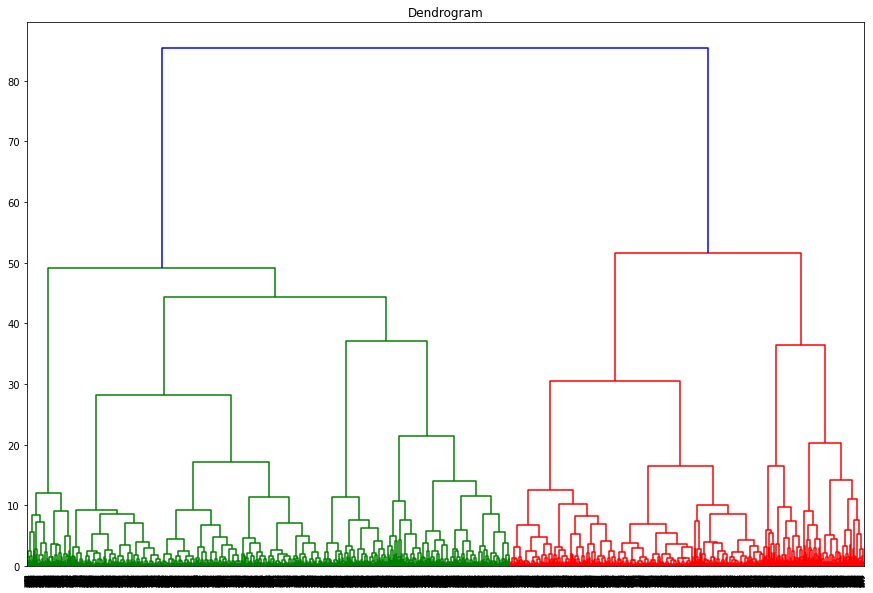

In [64]:
#plotting dendogram to determine number of clusters.
rcParams['figure.figsize'] = 15, 10
# Using the dendogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

**The Dendrogram suggests that there are two clusters.**

In [65]:
# Fitting hierarchical clustering to dataset
ag = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(X)
#creating agglomerative cluster columns
rfm_df_1['Agglomerative_Clusters'] =ag
rfm_df_1.head()

index  CustomerID  Recency  Frequency   Monetary  Total_amount  R  F  M  \
1      1     12347.0       40        182  23.681319       4310.00  4  5  4   
2      2     12348.0       76         31  57.975484       1797.24  3  3  5   
3      3     12349.0       19         73  24.076027       1757.55  4  4  4   
4      4     12350.0      311         17  19.670588        334.40  1  2  4   
5      5     12352.0       73         85  29.482824       2506.04  3  4  5   

  RFM_Class         customer  RFM_Score Customer_grade  Recency_log  \
1       454  Loyal Customers         26             A+     3.688879   
2       335               NA         20             B+     4.330733   
3       444  Loyal Customers         24              A     2.944439   
4       124               NA         11              C     5.739793   
5       345               NA         22              A     4.290459   

   Monetary_log  Frequency_log  K_mean_Cluster_2  K_mean_Cluster_3  \
1      3.164686       5.204007                 1                 0   
2      4.060020       3.433987                 0                 2   
3      3.181217       4.290459                 1                 0   
4      2.979125       2.833213                 0                 1   
5      3.383808       4.442651                 1                 1   

   Agglomerative_Clusters  
1                       1  
2                       0  
3                       1  
4                       0  
5                       1

In [66]:
#3d visualisation for agglomerative clustering
agglo_Cluster = px.scatter_3d(rfm_df_1, 
                    x = 'Recency', 
                    y = 'Frequency', 
                    z = 'Monetary',
                    hover_data=['customer','Agglomerative_Clusters'],
                    title='3d visualisation for agglomerative clustering',
                    color = 'Agglomerative_Clusters')
agglo_Cluster.show()

#3d visualisation of data using R, F and M score
agglo_Cluster = px.scatter_3d(rfm_df_1, 
                    x = 'R', 
                    y = 'F', 
                    z = 'M',
                    hover_data=['Agglomerative_Clusters'],
                    title='3d visualisation for agglomerative clustering',
                    color = 'Agglomerative_Clusters')
agglo_Cluster.show()

Let's analyse w.r.t customer classification based on RFM classes and composite score.

In [67]:
#Creating a temp df of cluster wise customer classification distribution
temp_df=rfm_df_1.groupby(['customer','Agglomerative_Clusters'])['CustomerID'].count().rename("Percentage").groupby(level = 0).transform(lambda x: (x*100)/x.sum()).reset_index()
#Creating bar graph from above dataframe
temp=px.bar(data_frame=temp_df,
                  width=1000,height=800,
                  x='Percentage',y='customer',
                  hover_data=['Percentage'],color='Agglomerative_Clusters',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Analysing customer classification w.r.t Agglomerative Clusters')
temp.show()

#Creating a temp df of cluster wise customer classification distribution
temp_df=rfm_df_1.groupby(['Customer_grade','Agglomerative_Clusters'])['CustomerID'].count().rename("Percentage").groupby(level = 0).transform(lambda x: (x*100)/x.sum()).reset_index()
#Creating bar graph from above dataframe
temp=px.bar(data_frame=temp_df,
                  width=1000,height=800,
                  x='Percentage',y='Customer_grade',
                  hover_data=['Percentage'],color='Agglomerative_Clusters',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Analysing customer classification w.r.t Agglomerative Clusters')
temp.show()

REMARKS:

When analysing agglomerative clusters w.r.t customer classification based on RFM classes,

*   The first cluster contains 81% of customers classified as 'Recent customer' and 76% of customers classified as 'About to sleep'.
*   The second cluster contains all customers classified as 'At Risk' and 78% of customers classified as 'Loyal customer'.

When analysing agglomerative clusters w.r.t customer classification based on RFM composite score,

*   The first cluster contains 87% of customers classified as 'A+' and 80% of customers classified as 'A'.
*   The second cluster contains 75% of customers classified as 'C'.



**For the subsequent analysis, RFM classes that are distributed between both clusters are dropped. The intention of doing this was to comprehend the clusters a bit better.**

In [68]:
#Creating a temporary df to identify RFM classes that are in all the clusters
tmp=rfm_df_1.groupby(['RFM_Class','Agglomerative_Clusters'])['CustomerID'].count().reset_index()#temporary dataframe for filtering
dff=tmp.groupby(['RFM_Class','Agglomerative_Clusters'])['CustomerID'].count().reset_index()
fg=dff.groupby('RFM_Class').agg({'Agglomerative_Clusters': lambda x: x.sum(),'CustomerID': lambda x: x.sum()}).reset_index()
tg=fg[fg['CustomerID']==1]

t=list(tg['RFM_Class'])#RFM classes that are part of only one cluster
len(t)

73

After filtering the data ,73 RFM classes are part of only one cluster.

In [69]:
#3d visualisation for agglomerative clustering after RFM class filtering
Kmeans_Cluster = px.scatter_3d(rfm_df_1[rfm_df_1['RFM_Class'].isin(t)], 
                    x = 'Recency', 
                    y = 'Frequency', 
                    z = 'Monetary',
                    hover_data=['customer'],
                    title='3d visualisation for Agglomerative clustering after RFM class filtering',
                    color = 'Agglomerative_Clusters')
Kmeans_Cluster.show()

#3d visualisation of data using R, F and M score
temp = px.scatter_3d(rfm_df_1[rfm_df_1['RFM_Class'].isin(t)], 
                    x = 'R', 
                    y = 'F', 
                    z = 'M',
                    hover_data=['customer'],
                    title='3d visualisation for Agglomerative clustering after RFM class filtering',
                    color = 'Agglomerative_Clusters')
temp.show()

Let's again analyse w.r.t customer classification based on RFM classes and composite score.

In [70]:
#Barplot for analysing customer classification after RFM class filtering.
gh=rfm_df_1[rfm_df_1['RFM_Class'].isin(t)]
temp_df=gh.groupby(['customer','Agglomerative_Clusters'])['CustomerID'].count().rename("Percentage").groupby(level = 0).transform(lambda x: x*100/x.sum()).reset_index()
#Creating bar graph from above dataframe
temp=px.bar(data_frame=temp_df,
                  width=1000,height=800,
                  x='Percentage',y='customer',
                  hover_data=['Percentage'],color='Agglomerative_Clusters',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Analysing customer classification w.r.t data filtered from boundary RFM classes')
temp.show()

#Barplot for analysing customer grade after RFM class filtering.
gh=rfm_df_1[rfm_df_1['RFM_Class'].isin(t)]
temp_df=gh.groupby(['Customer_grade','Agglomerative_Clusters'])['CustomerID'].count().rename("Percentage").groupby(level = 0).transform(lambda x: x*100/x.sum()).reset_index()
#Creating bar graph from above dataframe
temp=px.bar(data_frame=temp_df,
                  width=1000,height=800,
                  x='Percentage',y='Customer_grade',
                  hover_data=['Percentage'],color='Agglomerative_Clusters',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Analysing customer grade w.r.t data filtered from boundary RFM classes')
temp.show()

REMARKS:

After considering RFM classes belonging to only one cluster,


*   The first cluster contains all customers categorized as ‘potential Loyalist’, ‘Loyal Customers’ and ‘customer needing attention’ and ‘At Risk.
*   The second cluster contains 82% of customers categorized as ‘About to sleep’, 76% of customers categorized as ‘Can’t Lose Them’ and 64% of customers categorized as ‘Lost’.
*   Considering customer grade, the first cluster mainly contains high-graded customers and the second cluster contains mostly low-grade customers.

# Conclusion

I started with data cleaning and necessary feature changes. Then, to comprehend the data, an EDA was performed, which yielded many meaningful insights about the data. Then, using the available features, a behavioural customer segmentation based on recency, frequency, and monetary value was carried out.
The quintile method was used to compute R, F, and M scores, which divide recency, frequency, and monetary values into 5 groups (denoted from 1 to 5). Then, by combining R, F, and M scores, a three-digit RFM cell code was created and a composite score, which is the weighted sum of R, F, and M scores, was created.

Based on RFM cell code, customers were classified into 9 customer segments (‘Loyal Customer’, ‘Potential Loyalist’, ‘Recent Customers’, ‘Promising’, ‘Customers Needing Attention’, ‘About To Sleep’, ‘At Risk’, ‘Can’t Lose Them', and ‘Lost’) and analysed.

Based on the RFM composite score, customers were classified into 5 customer segments (A+, A, B+, B, C) and analysed.

Before implementing Kmeans and hierarchical clustering techniques (using recency, frequency, and monetary values), necessary feature engineering was carried out. Both Kmeans and hierarchical clustering suggested the presence of two clusters.

The clusters created were analysed with respect to customer segments created using RFM cell code and composite score.

In the case of K-means clustering,


*   K-means is able to distinguish clearly between 'lost' and 'Loyal Customer' categories.
*   The first cluster contains all customers classified as 'Lost', 76% of customers classified as 'Can't Lose them' and 98% of customers classified as 'About to Sleep'.
*   The second cluster contains 98% of all customers classified as 'Loyal customer' and 91% of customers classified as 'Potential Loyalist'.
*   Considering customer grade, the first cluster mainly contains high-graded customers and the second cluster contains mostly low-grade customers.

In the case of Hierarchical clustering,


*   The first cluster contains 81% of customers classified as 'Recent customer' and 76% of customers classified as 'About to sleep'.
*   The second cluster contains all customers classified as 'At Risk' and 78% of customers classified as 'Loyal customer'.
*   The first cluster contains 87% of customers classified as 'A+' and 80% of customers classified as 'A'.
*   The second cluster contains 75% of customers classified as 'C'.

**Future Scope:**

The future scope of this project includes inculcating data related to, 

*   Demographic (data includes age, sex, marital status, family size, occupation, education level, income, race, nationality and religion).
*   Psychographic (psychographic characteristics include personality traits, interests, beliefs, values, attitudes and lifestyles).

